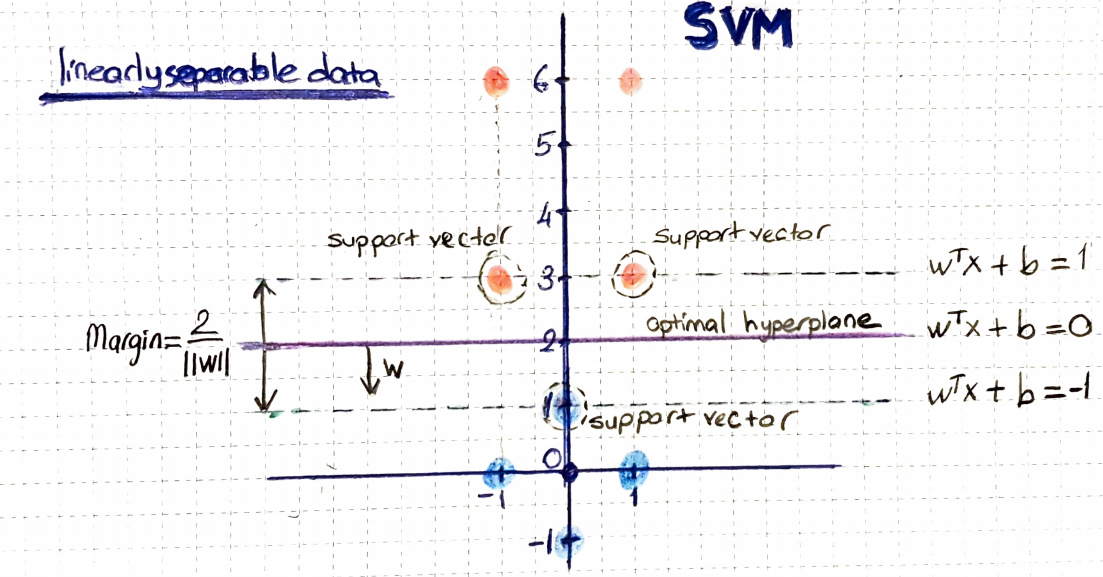

In [1]:
from IPython.display import Image
Image(filename= "svm.png")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [3]:
# Load data with only two classes and two features
# Creating the dataframe 
data = pd.DataFrame({"class":[ 0,  0, 0,  0, 1, 1,  1,  1],
                      "col1":[ 3,  3, 6,  6, 1, 0,  0, -1],  
                      "col2":[ 1, -1, 1, -1, 0, 1, -1,  0]}) 
  
# Print the dataframe 
data 

,class,col1,col2
0,0,3,1
1,0,3,-1
2,0,6,1
3,0,6,-1
4,1,1,0
5,1,0,1
6,1,0,-1
7,1,-1,0


In [4]:
y = data["class"].values
X_data = data.drop(["class"], axis=1)
# Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X_data)

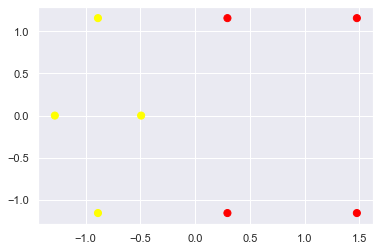

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

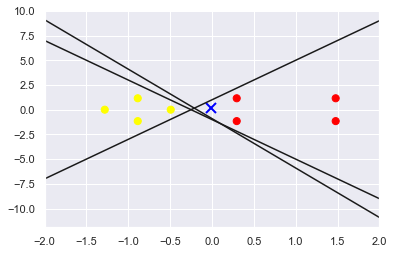

In [6]:
xfit = np.linspace(-2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([-0.01], [0.2], 'x', color='blue', markeredgewidth=2, markersize=10)

for m, b in [ (-4, -1), (-5, -0.9), (4, 1)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-2, 2);

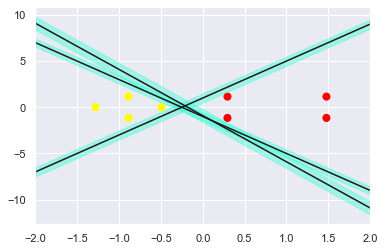

In [7]:
xfit = np.linspace(-2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(-4, -1, 0.44), (-5, -0.9, 0.7), (4, 1, 0.5)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#33FFD7', alpha=0.4)

plt.xlim(-2, 2);

In [8]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# Sonuç

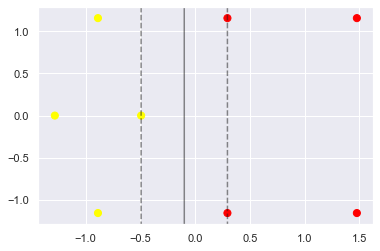

In [10]:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model);

In [11]:
model.support_vectors_

array([[ 0.29559878,  1.15470054],
       [ 0.29559878, -1.15470054],
       [-0.49266464,  0.        ]])